In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn

In [2]:
import os
import json

In [3]:
import re
from datetime import datetime
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for machine learning
from sklearn import metrics, preprocessing
## for deep learning
from tensorflow.keras import models, layers, utils  #(2.6.0)

In [4]:
# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns


In [5]:
# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)


# Users Dataset

In [6]:
#userDataset = pd.read_csv('raw_data\steam_users_purchase_play.csv')

In [7]:
#dfUsers = pd.DataFrame(userDataset)

In [8]:
#list(dfUsers.columns)

In [9]:
#display(dfUsers)

# Games Dataset

In [10]:
# games2005 = pd.read_csv('raw_data\year 2005-2008.csv')
# games2008 = pd.read_csv('raw_data\year 2008-2011.csv')
# games2011 = pd.read_csv('raw_data\year 2011-2014.csv')
# games2014 = pd.read_csv('raw_data\year 2014-2017.csv')
# games2017 = pd.read_csv('raw_data\year 2017-2022.csv')

In [11]:
# df2005 = pd.DataFrame(games2005)
# df2008 = pd.DataFrame(games2008)
# df2011 = pd.DataFrame(games2011)
# df2014 = pd.DataFrame(games2014)
# df2017 = pd.DataFrame(games2017)

In [12]:
# dfGames = pd.concat([df2005, df2008,df2011,df2014,df2017], axis=0)

In [13]:
# dfGames.info()

In [14]:
#  dfGames.rename(columns={'name': 'game_name'},
#           inplace=True, errors='raise')

In [15]:
# display(dfGames)

# Merged dataset

In [16]:
#df=pd.merge(dfUsers,dfGames)

In [17]:
df = pd.read_csv('users_games_dataset.csv')

C:\Users\USCS\AppData\Local\Temp\ipykernel_13084\3590791216.py:1: DtypeWarning: Columns (85,103,115,119,123) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('users_games_dataset.csv')


In [18]:
#df.to_csv('users_games_dataset.csv')

In [19]:
display(df)

,Unnamed: 0,user_id,game_name,hours,purchase,play,id,category,collection/id,collection/name,...,genres/5/id,genres/5/name,themes/5/id,themes/5/name,themes/6/id,themes/6/name,game_modes/4/id,game_modes/4/name,genres/6/id,genres/6/name
0,0,151603712,Fallout 4,87.0,1,1,9630,0,3,Fallout,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,87445402,Fallout 4,83.0,1,1,9630,0,3,Fallout,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,25096601,Fallout 4,1.6,1,1,9630,0,3,Fallout,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,211925330,Fallout 4,133.0,1,1,9630,0,3,Fallout,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,115396529,Fallout 4,17.9,1,1,9630,0,3,Fallout,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14201,14201,76892907,Double Dragon Trilogy,0.0,1,0,23805,3,694,Double Dragon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14202,14202,76892907,EvilQuest,0.0,1,0,3237,0,585,EvilQuest,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14203,14203,204401529,Assassin's Creed Rogue,62.0,1,1,7570,0,18,Assassin's Creed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14204,14204,116564064,Assassin's Creed Rogue,0.0,1,0,7570,0,18,Assassin's Creed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14206 entries, 0 to 14205
Columns: 128 entries, Unnamed: 0 to genres/6/name
dtypes: float64(48), int64(22), object(58)
memory usage: 13.9+ MB


In [21]:
columns=df.columns.tolist()
print(columns)

['Unnamed: 0', 'user_id', 'game_name', 'hours', 'purchase', 'play', 'id', 'category', 'collection/id', 'collection/name', 'franchises/0/id', 'franchises/0/name', 'game_modes/0/id', 'game_modes/0/name', 'genres/0/id', 'genres/0/name', 'keywords/0/id', 'keywords/0/name', 'keywords/1/id', 'keywords/1/name', 'keywords/2/id', 'keywords/2/name', 'keywords/3/id', 'keywords/3/name', 'keywords/4/id', 'keywords/4/name', 'keywords/5/id', 'keywords/5/name', 'keywords/6/id', 'keywords/6/name', 'keywords/7/id', 'keywords/7/name', 'keywords/8/id', 'keywords/8/name', 'keywords/9/id', 'keywords/9/name', 'keywords/10/id', 'keywords/10/name', 'keywords/11/id', 'keywords/11/name', 'keywords/12/id', 'keywords/12/name', 'keywords/13/id', 'keywords/13/name', 'keywords/14/id', 'keywords/14/name', 'keywords/15/id', 'keywords/15/name', 'keywords/16/id', 'keywords/16/name', 'keywords/17/id', 'keywords/17/name', 'keywords/18/id', 'keywords/18/name', 'keywords/19/id', 'keywords/19/name', 'keywords/20/id', 'keyword

In [22]:
i=2

print('keywords/'+str(i)+'/name')

keywords/2/name


In [23]:
# for j in range(0, len(columns)):
#     if j>21:
#         print('keywords/'+str(j)+'/name')
#         df = df.drop(['keywords/'+str(j)+'/name'], axis=1)
#         df = df.drop(['keywords/'+str(j)+'/id'], axis=1)

In [24]:
# for j in range(21, len(columns)):
#     print('keywords/'+str(j)+'/name')
#     df = df.drop(['keywords/'+str(j)+'/name'], axis=1)
#     df = df.drop(['keywords/'+str(j)+'/id'], axis=1)

In [25]:
# for j in range(2, len(columns)):
#     print('keywords/'+str(j)+'/name')
#     df = df.drop(['franchises/'+str(j)+'/name'], axis=1)
#     df = df.drop(['franchises/'+str(j)+'/id'], axis=1)

In [35]:
# for j in range(6, len(columns)):
#     print('keywords/'+str(j)+'/name')
#     df = df.drop(['platforms/'+str(j)+'/name'], axis=1)
#     df = df.drop(['platforms/'+str(j)+'/id'], axis=1)

In [ ]:
# for j in range(6, len(columns)):
#     print('keywords/'+str(j)+'/name')
#     df = df.drop(['platforms/'+str(j)+'/name'], axis=1)
#     df = df.drop(['platforms/'+str(j)+'/id'], axis=1)

In [ ]:
deleteVaraible ='\id'
for j in range(0, len(columns)):
    if(columns[j].str.contains(deleteVaraible))
    df = df.drop([column[j]], axis=1)
        

In [27]:
dfColumns=df.columns

# Analysing feature values

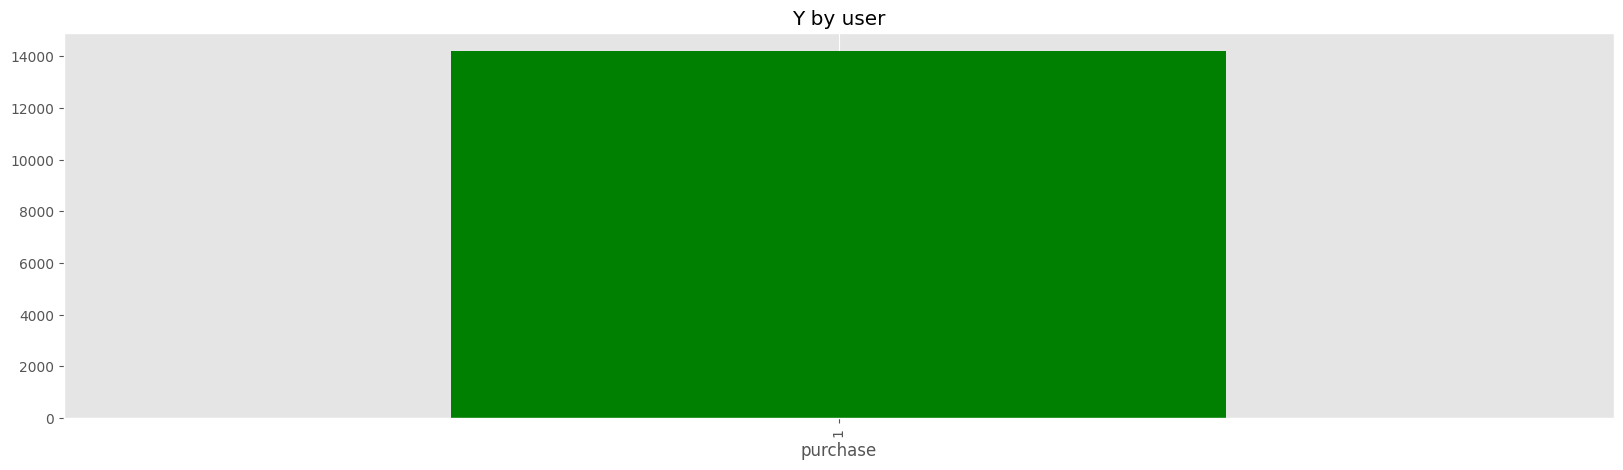

In [28]:
df.groupby("purchase").count()["game_name"].sort_values(ascending=False).plot(
    kind="bar", color="green", title="Y by user", figsize=(20,5)).grid(axis='y')

In [29]:
#sns.scatterplot(x="hours",y="game_name", data=df, palette="Dark2", s=80)

# Analysing data

In [30]:
#sns.pairplot(df)

In [31]:
df.describe()

,Unnamed: 0,user_id,hours,purchase,play,id,category,collection/id,franchises/0/id,game_modes/0/id,...,themes/3/id,game_modes/3/id,themes/4/id,genres/5/id,themes/5/id,themes/6/id,game_modes/4/id,game_modes/4/name,genres/6/id,genres/6/name
count,14206.000000,1.420600e+04,14206.000000,14206.0,14206.000000,14206.000000,14206.000000,14206.000000,14206.000000,14206.000000,...,3241.000000,1389.000000,2075.000000,22.0,683.000000,332.0,0.0,0.0,0.0,0.0
mean,7102.500000,1.277183e+08,87.735112,1.0,0.797762,6230.527805,0.351119,1928.696325,930.660355,1.386386,...,30.233570,4.106551,31.637590,34.0,32.535871,38.0,NaN,NaN,NaN,NaN
std,4101.063297,7.804432e+07,391.876552,0.0,0.401683,20850.966274,1.821546,2056.828150,889.895723,0.486938,...,7.633547,0.308653,8.645752,0.0,1.880550,0.0,NaN,NaN,NaN,NaN
min,0.000000,5.250000e+03,0.000000,1.0,0.000000,15.000000,0.000000,1.000000,5.000000,1.000000,...,19.000000,4.000000,22.000000,34.0,31.000000,38.0,NaN,NaN,NaN,NaN
25%,3551.250000,6.263878e+07,0.300000,1.0,1.000000,1011.000000,0.000000,89.000000,366.000000,1.000000,...,22.000000,4.000000,23.000000,34.0,31.000000,38.0,NaN,NaN,NaN,NaN
50%,7102.500000,1.201283e+08,3.300000,1.0,1.000000,2963.000000,0.000000,1150.000000,493.000000,1.000000,...,33.000000,4.000000,38.000000,34.0,33.000000,38.0,NaN,NaN,NaN,NaN
75%,10653.750000,1.852338e+08,21.000000,1.0,1.000000,2963.000000,0.000000,2946.000000,1686.000000,2.000000,...,38.000000,4.000000,41.000000,34.0,33.000000,38.0,NaN,NaN,NaN,NaN
max,14205.000000,3.099031e+08,11754.000000,1.0,1.000000,165247.000000,11.000000,7814.000000,3348.000000,2.000000,...,44.000000,5.000000,43.000000,34.0,38.000000,38.0,NaN,NaN,NaN,NaN


In [32]:
for col in df:
    print(df[col].unique())

[    0     1     2 ... 14203 14204 14205]
[151603712  87445402  25096601 ... 287330018 122492047 190650796]
['Fallout 4' 'HuniePop' 'Tomb Raider' 'The Banner Saga'
 'BioShock Infinite' 'Grand Theft Auto IV' 'Dota 2' 'BioShock'
 'BioShock 2' 'Ultra Street Fighter IV' "Sid Meier's Civilization V"
 'Orcs Must Die! 2' 'Undertale' "Assassin's Creed II" 'Grand Theft Auto V'
 'Dying Light' 'Mad Max' 'Portal 2' 'Cave Story+' 'Sleeping Dogs'
 'Watch_Dogs' "Assassin's Creed III" 'Ori and the Blind Forest' 'Portal'
 'LEGO The Lord of the Rings' 'DiRT Showdown' 'Borderlands 2'
 'The Legend of Korra' 'Sonic & All-Stars Racing Transformed'
 'Valkyria Chronicles' 'Sonic Generations' 'PixelJunk Shooter'
 "Assassin's Creed IV Black Flag" 'Borderlands' 'Devil May Cry 4'
 'Fallout 3' 'Guardians of Middle-earth' 'Nosgoth' 'Shadowrun Returns'
 'Sonic CD' 'The Incredible Adventures of Van Helsing II'
 'The Wolf Among Us' 'Warframe' 'Deadpool' "Five Nights at Freddy's 2"
 "Assassin's Creed Brotherhood" 'Worm

<AxesSubplot: xlabel='hours', ylabel='Density'>

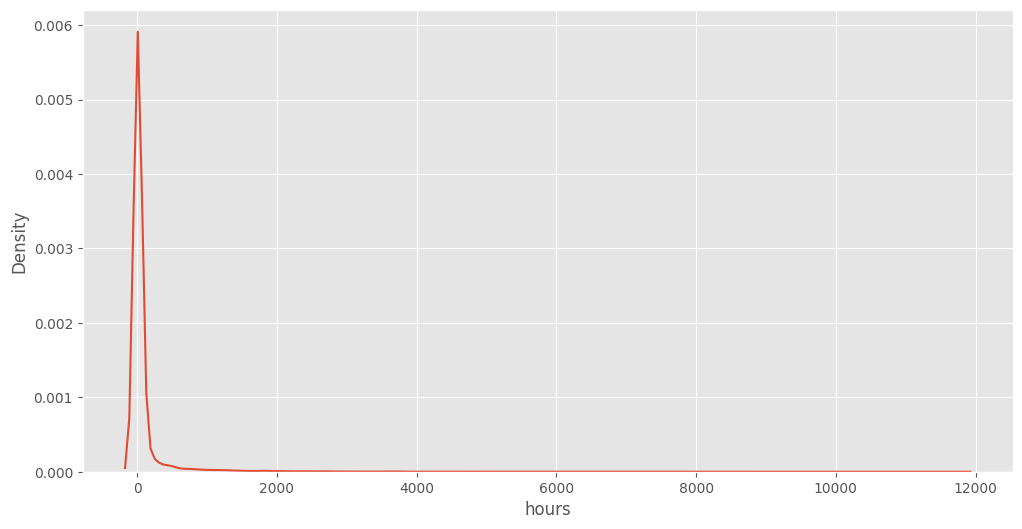

In [33]:
sns.kdeplot(df['hours'])

In [34]:
df["hours"].value_counts()

0.0       2873
0.2        305
0.3        295
0.5        248
0.4        247
          ... 
1177.0       1
1409.0       1
4074.0       1
626.0        1
1363.0       1
Name: hours, Length: 1123, dtype: int64